## **13. 이상치 탐지**

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

### **데이터 탐색**

In [6]:
"""
    데이터셋 로딩
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

path = './data/'
file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(
    path + file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

df.head()

/var/folders/lw/n62s2pv56dd83dsl2w6v59zh0000gn/T/ipykernel_15656/494520007.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<Axes: xlabel='Datetime'>

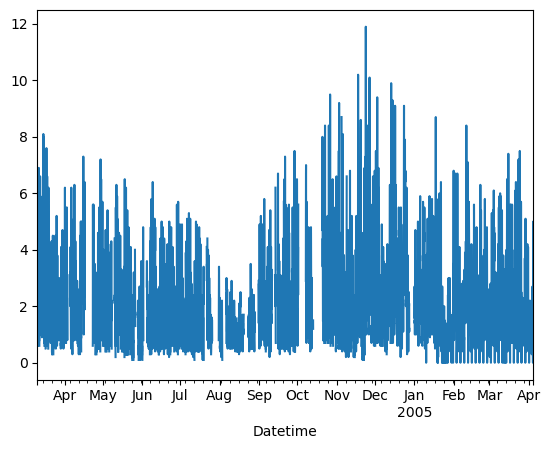

In [16]:
# [+] 일산화탄소 변수 (CO(GT)) 시각화
df['CO(GT)'].plot()

In [17]:
# [+] 결측 데이터 처리: 선형 보간
co = df['CO(GT)'].copy() # Series 복사
co.interpolate(inplace=True) # 선형 보간

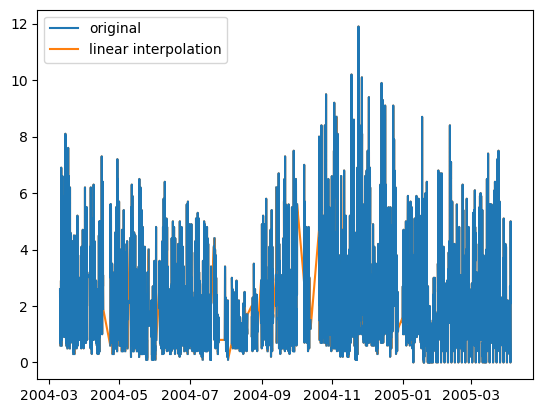

In [18]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='original', zorder=2)
plt.plot(co, label='linear interpolation', zorder=1)
plt.legend(loc='best')
plt.show()

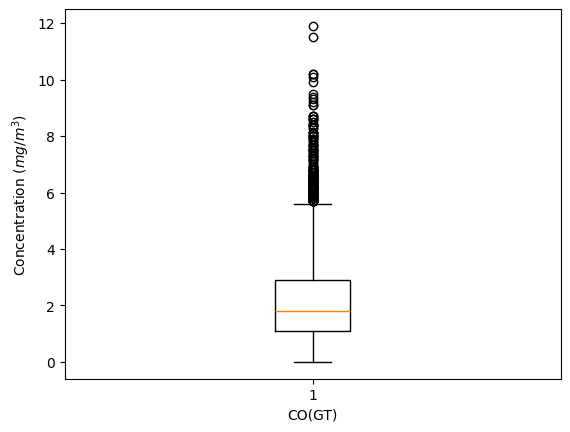

In [19]:
# [+] 이상치 시각화: 박스플롯
plt.boxplot(co)
plt.xlabel('CO(GT)')
plt.ylabel('Concentration (${mg/m^3}$)')
plt.show()

In [22]:
# [+] 변수 간 상관관계 측정
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [23]:
# 일산화탄소와 가장 상관관계가 약한 변수 선택
rh = df['RH'].copy().interpolate() # RH: 상대습도

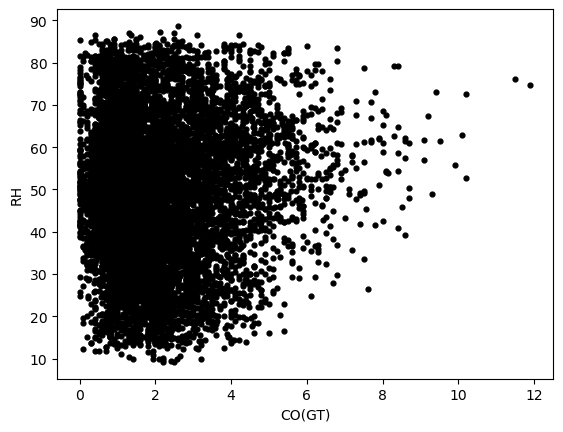

In [24]:
# 산포도 시각화
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('RH')
plt.show()

In [25]:
# 일산화탄소와 가장 상관관계가 강한 변수 선택
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: 비메탄계 탄화수소

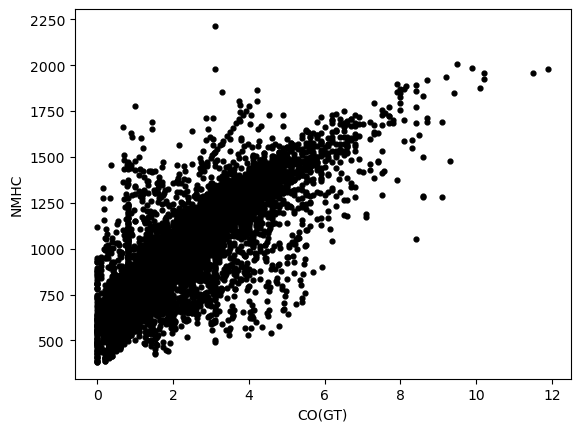

In [26]:
# 산포도 시각화
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel("NMHC")
plt.show()

### **사분위수 범위 기반 이상치 탐지**

In [28]:
# [+] Q1, Q2, Q3 계산
q1 = co.quantile(0.25)
q2 = co.quantile(0.50)
q3 = co.quantile(0.75)
print(q1, q2, q3)

1.1 1.8 2.9


In [29]:
co

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64

In [ ]:
# [+] IQR, 상한(upper_fence), 하한(lower_fence)
iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(iqr, upper_fence, lower_fence)

1.7999999999999998 5.6 -1.5999999999999996


In [33]:
# [+] 이상치 선택
outliers = co.loc[(co > upper_fence) | (co < lower_fence)]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64

In [ ]:
# [+] 이상치 여부 마스킹 -> 정상 데이터만 뽑으려고 마스킹 정상 데이터: false, 비정상: True
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

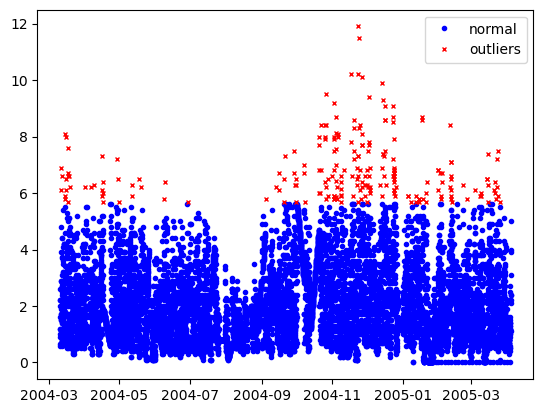

In [35]:
# 정상 데이터 / 이상치 시각화
plt.plot(co[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [ ]:
# [+] 이상치 제거
co_refined = co.copy()
...
co_refined[mask]

In [ ]:
# [+] 제거된 이상치에 대한 대치: 선형보간
...
co_refined.plot()

### **Z-점수 기반 이상치 탐지**

In [ ]:
# 일산화탄소 변수 분포 시각화
import seaborn as sns
sns.distplot(co)

In [ ]:
# [+] 평균, 표준편차
mean = ...
std = ...
print(mean, std)

In [ ]:
# [+] 데이터 포인트별 Z-점수 계산
outliers = []
thres = 3

...

In [ ]:
# [+] 이상치 선택
outliers = ...

In [ ]:
# [+] 마스킹
mask = ...
mask[:50]

In [ ]:
# 이상치 제거 전/후 분포 시각화
sns.distplot(co, axlabel='CO(GT)', label='original')
sns.distplot(co[~mask], label='outliers removed')
plt.legend(loc='best')
plt.show()

In [ ]:
# 기타 이상치 제거 방법: Flooring, Capping
floor = co.quantile(0.1)
cap = co.quantile(0.9)

co.loc[co < floor] = floor
co.loc[co > cap] = cap

In [ ]:
# 시각화
co.plot()